In [1122]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns
% matplotlib inline

##Loading the dataset

In [1123]:
df = pd.read_csv('crack_detection.csv',index_col=0)

In [1124]:
df.head()

,mean_r,std_r,kur_r,skew_r,mean_g,std_g,kur_g,skew_g,mean_b,std_b,...,contrast_r,contrast_g,contrast_b,corr_rg,corr_rb,corr_gb,moment_r,moment_g,moment_b,label
0,107.5734,29.267480,0.744029,0.408828,110.2533,26.953218,1.254689,-0.135613,113.5715,25.422051,...,9.181953,177.0,173.0,162.0,0.951368,0.913876,0.803333,856.585412,726.475939,0
1,178.6713,14.917756,3.192406,0.238175,184.4947,14.882156,3.035196,0.141160,190.8538,14.806283,...,9.207314,142.0,136.0,129.0,0.988325,0.989474,0.976787,222.539456,221.478572,0
2,176.6517,34.618255,-0.146336,-0.421552,161.3083,33.688699,0.057178,-0.521476,147.2760,30.809486,...,9.186737,199.0,200.0,194.0,0.968581,0.967398,0.890845,1198.423587,1134.928451,1
3,113.5760,20.084502,0.719752,0.737728,114.0056,19.536222,0.655846,0.729521,113.6179,18.108592,...,9.197973,146.0,142.0,138.0,0.987383,0.983663,0.961305,403.387224,381.663969,0
4,125.3565,29.251595,0.430344,0.833496,129.5277,28.661968,0.475502,0.804161,131.9745,27.475848,...,9.189257,173.0,176.0,177.0,0.980727,0.986702,0.950291,855.655808,821.508433,1


In [1125]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 700 entries, 0 to 699
Data columns (total 24 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   mean_r      700 non-null    float64
 1   std_r       700 non-null    float64
 2   kur_r       700 non-null    float64
 3   skew_r      700 non-null    float64
 4   mean_g      700 non-null    float64
 5   std_g       700 non-null    float64
 6   kur_g       700 non-null    float64
 7   skew_g      700 non-null    float64
 8   mean_b      700 non-null    float64
 9   std_b       700 non-null    float64
 10  kur_b       700 non-null    float64
 11  skew_b      700 non-null    float64
 12  entropy_r   700 non-null    float64
 13  entropy_g   700 non-null    float64
 14  contrast_r  700 non-null    float64
 15  contrast_g  700 non-null    float64
 16  contrast_b  700 non-null    float64
 17  corr_rg     700 non-null    float64
 18  corr_rb     700 non-null    float64
 19  corr_gb     700 non-null    f

In [1126]:
# 349 labelled as cracks and 351 labelled as non-cracks
df['label'].value_counts()

0    351
1    349
Name: label, dtype: int64

In [1127]:
# Our dataset contains 700 training samples and 24 features
df.shape

(700, 24)

## Split the dataset into X and Y

In [1128]:
X = df.iloc[:,:-1].values
Y = df.iloc[:,-1:].values

In [1129]:
# Print the shape of X and Y
print(X.shape)
print(Y.shape)

(700, 23)
(700, 1)


##Normalization

In [1130]:
# Normalization
# This technique transforms the values in variables between 0 and 1. 
# From the above, we can see that the numerical variables are varying in different ranges and the outcome is the target variable. 
# We will perform both the scaling techniques and apply Logistic Regression.
def normalize(x):
  return (x - np.mean(x,axis = 0))/np.std(X,axis = 0)

In [1131]:
X = normalize(X)

##Test-Train Split using scikit-learn
#60% train, 20% validation, and 20 % test

In [1132]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

##Printing the shapes 

In [1133]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)
print(X_val.shape)
print(y_val.shape)

(420, 23)
(420, 1)
(140, 23)
(140, 1)
(140, 23)
(140, 1)


##Sigmoid Function

In [1134]:
def sigmoid(x):
  return 1.0/(1+np.exp(-x))

##Forward Propagation

In [1135]:
def forward(X,W,b):
  y_hat = sigmoid(np.dot(X,W)+b)
  return y_hat

##Function to predict a crack ( 0 means no crack whereas 1 means non-crack )

In [1136]:
def predict(X,W,b):
  y_hat = sigmoid(np.dot(X,W)+b)
  y = np.where(y_hat>0.5,1,0)
  return y

##Binary Cross-Entropy / Log Loss

In [1137]:
#w here y is the label (1 for crack and 0 for non-crack) and y_hat is the predicted probability of the point being a crack for all N points.
# def cost(y, y_hat):
#     loss = -np.mean(y*(np.log(y_hat)) + (1-y)*np.log(1-y_hat))
#     return loss
# def cost(y_true,y_pred):
#     '''In this function, we will compute log loss '''
#     log_loss = (-((y_true * np.log10(y_pred)) + (1-y_true) * np.log10(1-y_pred)).mean())
#     return log_loss
def cost( y_true, y_pred):
    # binary cross entropy
    y_zero_loss = y_true * np.log(y_pred + 1e-9)
    y_one_loss = (1-y_true) * np.log(1 - y_pred + 1e-9)
    return -np.mean(y_zero_loss + y_one_loss)

#Gradient descent
## w := w-lr*dw

##b := b-lr*db

where, ```dw``` is the partial derivative of the Loss function with respect to ```w``` and ```db``` is the partial derivative of the Loss function with respect to ```b``` 

##dw = (1/m)*(y_hat — y).X

##db = (1/m)*(y_hat — y)



In [1138]:
def gradient(X,Y,W,b):
  m = X.shape[0]
  # Changing from 1D to 2D
  y_hat = np.expand_dims(forward(X,W,b),axis =1)
  dw = ((1/m)*np.dot(X.T, (y_hat - Y))).squeeze()
  db = (1/m)*(np.sum((y_hat - Y)))
  return dw,db

In [1139]:
def BinarylogRegClassifier(X,Y,num_iter,lr=0.01):
  # m is the number of training examples i.e 700 and n is the number of features i.e. 23
  m,n = X.shape
  # Calculating the weight matrix
  W = np.random.random((n))
  # Calculating the bias
  b = np.random.random(1)
  losses = []

  for i in range(num_iter):
    # Finding y_hat by calling forward() function
    y_hat = forward(X,W,b)
    # Calculating and at the same time appending the loss
    losses.append([i,cost(Y,y_hat)])
    # dw is the partial derivative of the Loss function with respect to w and db is the partial derivative of the Loss function with respect to b
    dw,db = gradient(X,Y,W,b)
    # Updating weights and bias
    W -= lr*dw
    b -= lr*db

  return losses,W,b

### Calling the ```BinarylogRegClassifier``` function with number of iterations as 1500

In [1140]:
losses,W,b = BinarylogRegClassifier(X_train,y_train,1500)

##Converting the list into array

In [1141]:
losses = np.asarray(losses)

In [1142]:
print(losses)

[[0.00000000e+00 1.64838922e+00]
 [1.00000000e+00 1.64863429e+00]
 [2.00000000e+00 1.64887036e+00]
 ...
 [1.49700000e+03 1.12572699e+00]
 [1.49800000e+03 1.12573078e+00]
 [1.49900000e+03 1.12573470e+00]]


In [1143]:
#shape 
losses.shape

(1500, 2)

In [1144]:
# Calculating epochs and losses
epochs = losses[:,0]
loss = losses[:,1]

In [1145]:
print(epochs.shape)
print(loss.shape)

(1500,)
(1500,)


##Plotting epochs vs. loss


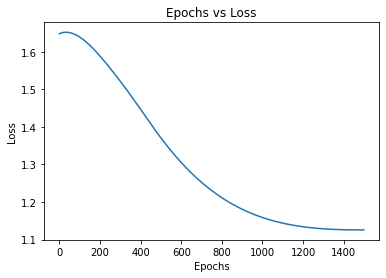

In [1146]:
plt.plot(epochs,loss)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title("Epochs vs Loss")
plt.show()

##Function to calculate accuracy

In [1147]:
def accuracyCalculator(y,y_hat):
  summ = 0
  for i in range(len(y)):
    if(y[i]==y_hat[i]):
      summ += 1
  accuracy = summ/len(y)
  return accuracy

In [1148]:
predictions = predict(X_test,W,b)

##Array contains all the predicted values i.e 1 for crack and 0 for non-crack

In [1149]:
predictions

array([1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 1])

##Printing the accuracy

In [1150]:
accuracyCalculator(y_test,predictions)

0.8

##Calculating the f1_score for training, validation and test set

In [1151]:
from sklearn.metrics import f1_score
y_train_pred = predict(X_train,W,b)
y_val_pred = predict(X_val,W,b)
y_test_pred = predict(X_test,W,b)

f1_score_train=f1_score(y_train,y_train_pred)
f1_score_val=f1_score(y_val,y_val_pred)
f1_score_test=f1_score(y_test,y_test_pred)

print(f1_score_train)
print(f1_score_val)
print(f1_score_test)

# f1_score for training set= 0.79
# f1_score for validation set=0.72
# f1_score for test set=0.79


0.7991071428571429
0.7297297297297296
0.7941176470588235
